# Foward

In [1]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [2]:
Ks = np.arange(0.1,10+0.05,0.2)
ms = np.arange(3.5,10+0.05,0.2)

In [3]:
df = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d','r_sec_ul','r_sec_ud'])
df = df.set_index(['K','m'])


In [4]:
for m in tqdm(ms):
    r_ds,r_us  = rm_numpy(Ks,m,samples=100)
    r_mds = F_l1(r_ds,Ks,m)*(Ks*r_ds)
    r_mus = F_l1(r_us,Ks,m)*(Ks*r_us)
    r_sds,r_sus,r_su_ls,r_su_ds = rs_numpy(Ks,m,r_us,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su,r_su_l,r_su_d in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus,r_su_ls,r_su_ds):
        df.loc[(K,m),'r_mean_d'] = r_d
        df.loc[(K,m),'r_mean_u'] = r_u
        df.loc[(K,m),'r_main_d'] = r_md
        df.loc[(K,m),'r_main_u'] = r_mu
        df.loc[(K,m),'r_sec_d'] = r_sd
        df.loc[(K,m),'r_sec_u'] = r_su
        df.loc[(K,m),'r_sec_ul'] = r_su_l
        df.loc[(K,m),'r_sec_ud'] = r_su_d

  0%|          | 0/33 [00:00<?, ?it/s]

0.0
0.14659027777777778
0.14101742424242425
0.13276654040404037
0.10222424242424244
0.11662184343434343
0.08875757575757576
0.08607954545454546
0.08194772727272728
0.08878308080808081
0.07855555555555557
0.21219999999999997
0.14622045454545457
0.12510227272727273
0.10872803030303033
0.09691919191919193
0.08803068181818183
0.12835416666666669
0.0765916666666667
0.07319949494949493
0.07006237373737376
0.09962272727272728
0.09329747474747477
0.06452777777777777
0.06335454545454547
0.06308674242424245
0.0673078282828283


KeyboardInterrupt: 

In [34]:
# df.sort_index().to_excel(f'Order parameter and secondary cluster2.xlsm')


# Backward

In [7]:
Ks = np.arange(0.1,10+0.05,0.1)
ms = np.arange(0.1,10+0.05,0.1)

In [12]:
df_b = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d','r_sec_ul','r_sec_ud'])
df_b = df.set_index(['K','m'])


In [13]:
for m in tqdm(ms):
    r_ds,r_us  = rm_b_numpy(Ks,m,samples=20)
    r_mds = F_l1b(r_ds,Ks,m)*(Ks*r_ds)
    r_mus = F_l1b(r_us,Ks,m)*(Ks*r_us)
    r_sds,r_sus = rs_numpy(Ks,m,r_us,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus):
        df_b.loc[(K,m),'r_mean_d'] = r_d
        df_b.loc[(K,m),'r_mean_u'] = r_u
        df_b.loc[(K,m),'r_main_d'] = r_md
        df_b.loc[(K,m),'r_main_u'] = r_mu
        df_b.loc[(K,m),'r_sec_d'] = r_sd
        df_b.loc[(K,m),'r_sec_u'] = r_su

  0%|          | 0/100 [00:00<?, ?it/s]

0.5763631578947368
nan
nan
nan


In [17]:
df_b.sort_index().to_excel(f'Order parameter and secondary cluster backward.xlsm')

In [18]:
df = df_b

In [20]:
df

,,r_mean_u,r_mean_d,r_main_u,r_main_d,r_sec_u,r_sec_d
K,m,,,,,,
0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.5,0.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9.6,10.0,0.973687,0.003389,0.994227,0.020386,NaN,NaN
9.7,10.0,0.973687,0.003389,0.994346,0.020598,NaN,NaN
9.8,10.0,0.973687,0.003389,0.994462,0.020811,NaN,NaN


In [14]:
df

,,r_mean_u,r_mean_d,r_main_u,r_main_d,r_sec_u,r_sec_d,r_sec_ul,r_sec_ud
K,m,,,,,,,,
0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9.6,10.0,0.618725,0.003256,0.670847,0.019587,0.135757,NaN,0.100879,-0.010408
9.7,10.0,0.623775,0.003256,0.675359,0.019791,0.133959,NaN,0.099998,-0.010231
9.8,10.0,0.628825,0.003256,0.67983,0.019995,0.132161,NaN,0.099124,-0.010052


In [37]:
df['r_sec_u'].apply(lambda x: np.where(x>0.000,x,np.nan)).dropna().to_clipboard()

In [14]:
df.tail(50)

,,r_mean_u,r_mean_d,r_main_u,r_main_d,r_sec_u,r_sec_d,r_sec_ul,r_sec_ud
K,m,,,,,,,,
0.1,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.1,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.3,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.5,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.7,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


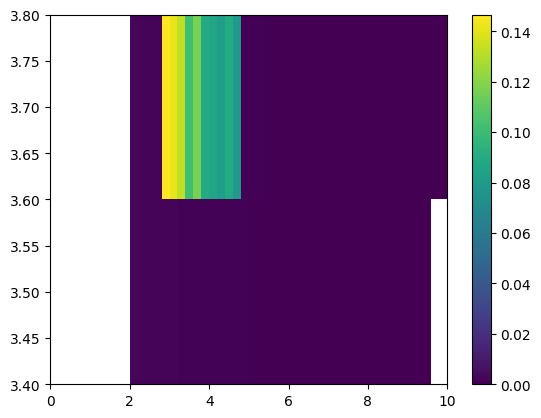

In [13]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df['r_sec_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T)
plt.colorbar()

## Check analytic

In [17]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r

max_c = 3e-4

In [18]:
np.save(f'231024 secondary cluster/N={N},K={K} r_std',r_std_sets)
np.save(f'231024 secondary cluster/N={N},K={K} r_mean',r_mean_sets)

NameError: name 'N' is not defined

In [19]:
N_100 =np.load('231024 secondary cluster/N=100,K=5 r_std.npy',allow_pickle=True).tolist()
N_250 =np.load('231024 secondary cluster/N=250,K=5 r_std.npy',allow_pickle=True).tolist()

N_500 =np.load('231024 secondary cluster/N=500,K=5 r_std.npy',allow_pickle=True).tolist()
N_1000 =np.load('231024 secondary cluster/N=1000,K=5 r_std.npy',allow_pickle=True).tolist()
N_2000 =np.load('231024 secondary cluster/N=2000,K=5 r_std.npy',allow_pickle=True).tolist()


In [20]:
NM_100 =np.load('231024 secondary cluster/N=100,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_250 =np.load('231024 secondary cluster/N=250,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_500 =np.load('231024 secondary cluster/N=500,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_1000 =np.load('231024 secondary cluster/N=1000,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_2000 =np.load('231024 secondary cluster/N=2000,K=5 r_mean.npy',allow_pickle=True).tolist()


In [21]:
m_set = np.linspace(3,6,31,endpoint=True).reshape(-1,1)

In [22]:
N_set = 31
m_set = np.linspace(3.0,6.0,N_set,endpoint=True).reshape(-1,1)

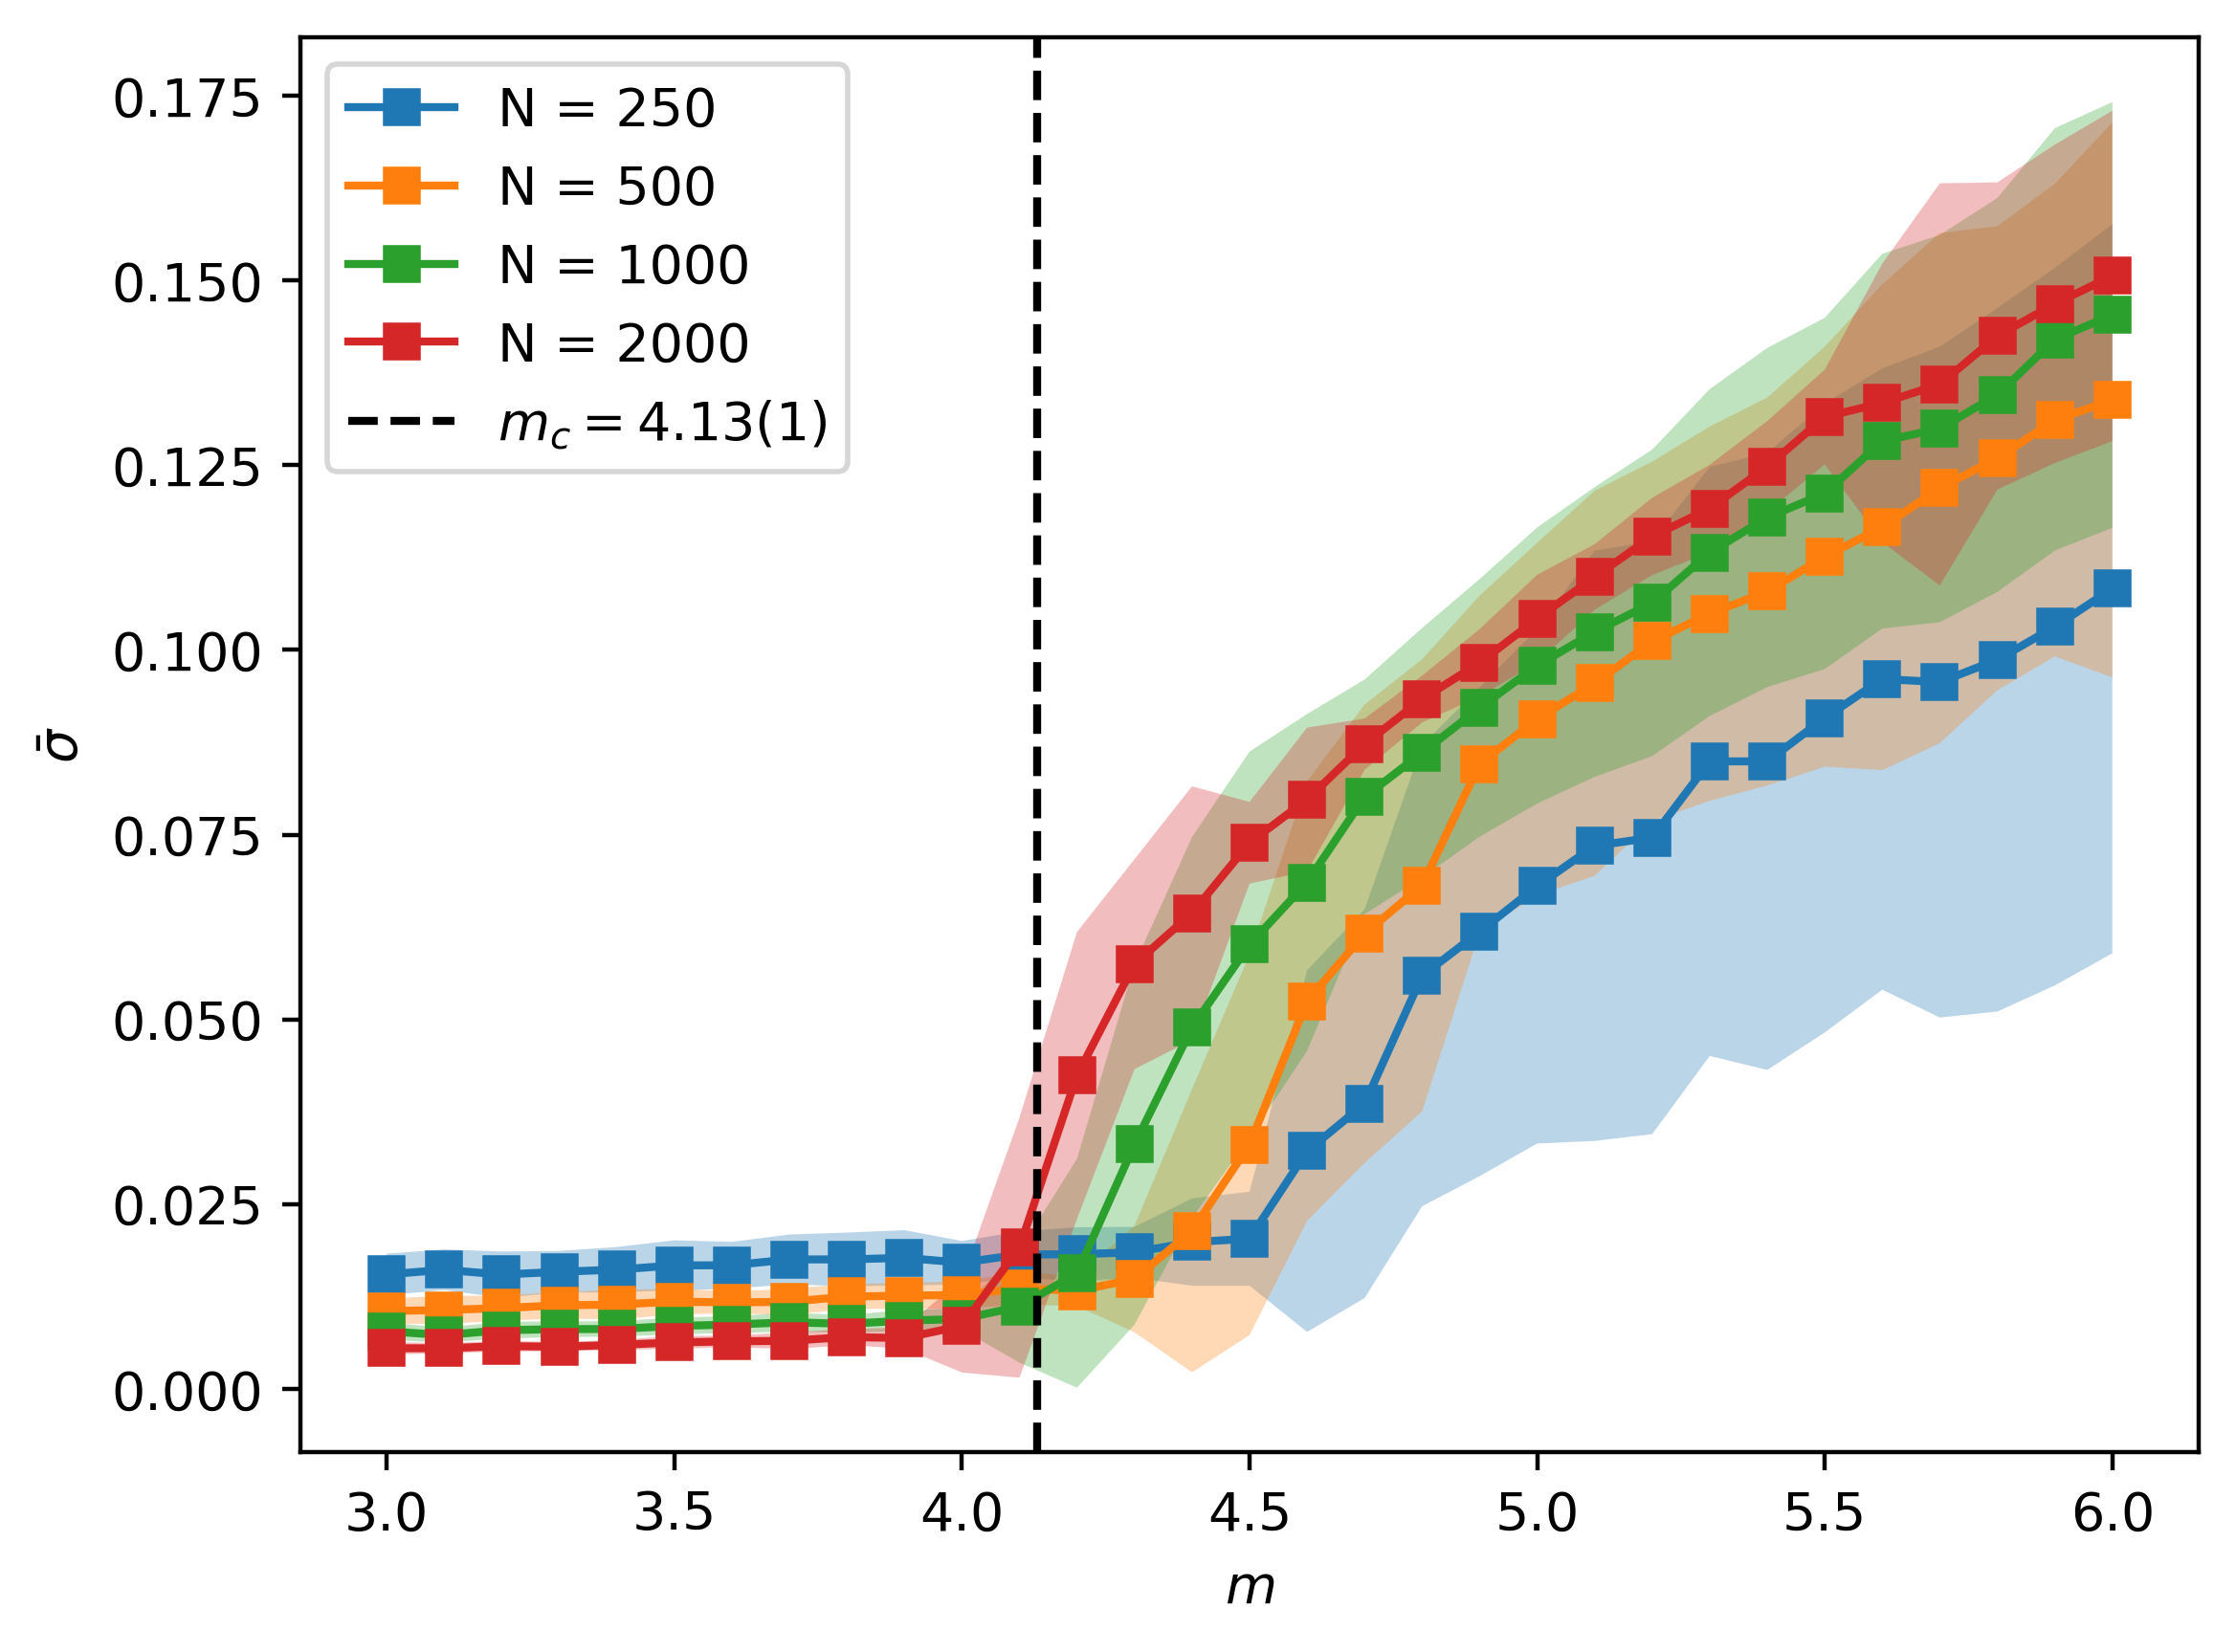

In [23]:
plt.figure(dpi=400)
for N_sets,r_means,N in zip([N_250,N_500,N_1000,N_2000],[NM_250,NM_500,NM_1000,NM_2000],[250,500,1000,2000]):
    A = np.array([*N_sets.values()])
    B = np.array([*r_means.values()])
    B = np.where(B>0.2,A,np.nan)
    # print(sum(np.isnan(B)))
    # As = np.where(A>20e-3,A,np.nan)
    As = B
    r_std_means = np.nanmean(As,axis=0)
    r_std_stds = np.nanstd(As,axis=0)
    plt.plot(m_set.reshape(-1),r_std_means,'s-',label=f'N = {N}')
    plt.fill_between(m_set.reshape(-1),r_std_means-r_std_stds,r_std_means+r_std_stds,alpha=0.3)
plt.axvline(4.13,color='black',ls='--',label='$m_c=4.13(1)$')
plt.ylabel(r'$\bar{\sigma}$')
plt.xlabel('$m$')
plt.legend()


array([[0.81632212, 0.80588807, 0.79552153, ..., 0.54595133, 0.56640695,
        0.55101462],
       [0.81767969, 0.80860754, 0.79614019, ..., 0.55804356, 0.54494128,
        0.54441436],
       [0.81498204, 0.80594736, 0.7942151 , ..., 0.5896872 , 0.58469367,
        0.57422569],
       ...,
       [0.81498515, 0.80723331, 0.79424376, ..., 0.56563678, 0.56317995,
        0.53474041],
       [0.81430254, 0.80391075, 0.79421686, ..., 0.570491  , 0.55306693,
        0.55448747],
       [0.81497475, 0.80524234, 0.79689491, ..., 0.56033846, 0.54445875,
        0.54500695]])

In [ ]:
r_std > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

array([0.00509693, 0.00583488, 0.0073077 , 0.00830072, 0.00785577,
       0.008819  , 0.0076664 , 0.00923616, 0.01012964, 0.00890378,
       0.00941223, 0.00964712, 0.00885686, 0.00997693, 0.06743758,
       0.07009167, 0.07768953, 0.07759946, 0.0916357 , 0.09367538,
       0.11395118, 0.10901704, 0.11719756, 0.10373543, 0.11911924,
       0.12612365, 0.13015778, 0.14497817, 0.14003615, 0.15916645,
       0.14204481])

In [51]:
m_set.shape

(31, 1)

1
9


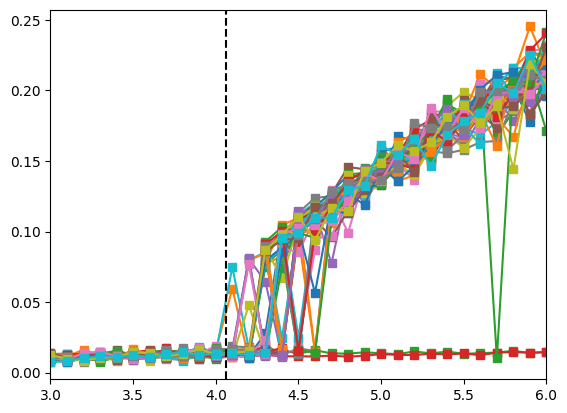

In [52]:
for seed,r_std in N_1000.items():
    # r_stds = np.where(r_std>20e-3,r_std,np.nan)
    plt.plot(m_set,r_std*np.sqrt(2),'s-')
    r_std = np.array(r_std)
    if r_std[m_set.reshape(-1)==4.1]>0.02:
        print(seed)
    plt.grid()
    plt.xlim(3,6)
plt.axvline(4.06,color='black',ls='--',label='$m_c=4.06(1)$')

# plt.plot(ms,r_su,label='r_main')

## Order parameter check again

In [1]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [3]:
def Bisection(f,r_a,r_b,eps =1e-5,end=30,arg=()):
    r_c = (r_a+r_b)/2
    num = 0 
    
    while abs(f(r_c,*arg))>eps:
        r_c = (r_a+r_b)/2
        if f(r_a,*arg)*f(r_c,*arg)>0:
            r_a = r_c
        else:
            r_b = r_c
        num+=1
        if num >end:
            # print('Please select another section')
            return np.NAN
    # print(f'count : {num}')
    return r_c


In [2]:
def r_lock1(r,K,m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return X*I_l

    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return X*I_l

def r_drift1(r,K,m,g=g_n):
    X = K*r
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -X/(m)*I_d

def r_mean_Kr(Kr,m,g=g_n):
    X = Kr
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)
    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    rl = X*I_l
    rd = -X/(m)*I_d
    return rl+rd
def r_mean(r,K,m,g=g_n):
    rl = r_lock1(r,K,m,g=g_n)
    rd = r_drift1(r,K,m,g=g_n)
    return rl+rd - r

In [3]:
def get_r_mean(K,m,Kb,rb,end=30):
    r_d,r_u = np.nan,np.nan
    if K<Kb:
        return r_d,r_u
    else:
        r_u = Bisection(r_mean,rb,1,end=end,arg = (K,m,g_n))
        r_d = Bisection(r_mean,0.01,rb,end=10,arg = (K,m,g_n))
    return r_d,r_u

In [4]:
rm_numpy = np.vectorize(get_r_mean)
rmKr_numpy = np.vectorize(r_mean_Kr)

In [5]:
Kr = np.logspace(np.log10(0.1),np.log10(10),num=500,base=10)
R = rmKr_numpy(Kr,4)
Kb =1/np.nanmax((R/Kr))
rb = Kr[np.nanargmax((R/Kr))]*np.nanmax((R/Kr))

In [6]:
R = rmKr_numpy(Kr,4)

In [8]:
Ks = np.arange(0.1,10.05,0.1)

In [9]:
rs_d,rs_u = rm_numpy(Ks,4,Kb,rb)

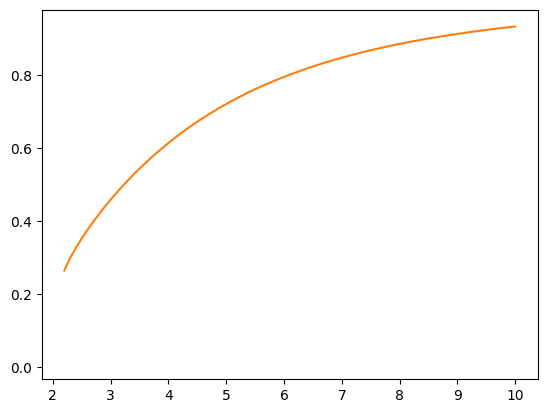

In [10]:
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)

In [11]:
A = np.where(np.abs(R*Ks.reshape(-1,1)-Kr)<3e-2)

In [12]:
RR = R*np.ones_like(Ks.reshape(-1,1))
KK = np.ones_like(R)*Ks.reshape(-1,1)

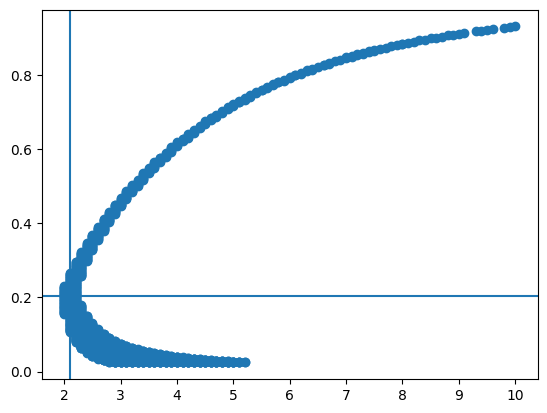

In [13]:
plt.scatter(KK[A],RR[A])
plt.axhline(rb)
plt.axvline(Kb)

In [ ]:
(X/K_)[abs(R@Ks-/K_)<5e-4]

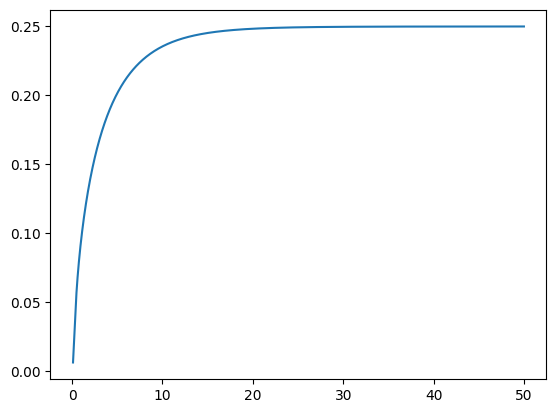

In [66]:
K = 4
plt.plot(Kr,R/K)
# plt.plot(Kr,Kr)
# plt.ylim(0,1)

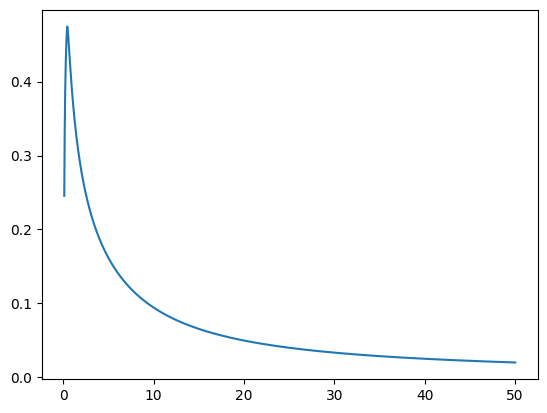

In [67]:
plt.plot(Kr,(R/Kr))
# plt.plot(Ks,1/Ks)

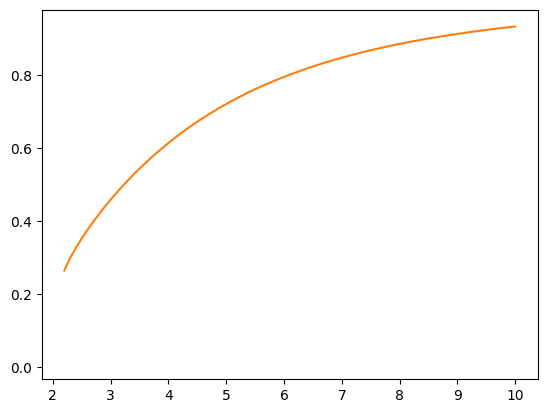

In [14]:
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)

In [15]:
from numba import jit
@jit
def get_r_mean(K,m,g=g_n,samples=200):
    rm_u = np.nan
    rm_d = np.nan
    r_1test = np.linspace(1e-4,1,samples)
    F1  = F_mean(r_1test,K,m,g=g)
    cross_point = np.sign((F1[0:-1]-1/K)*(F1[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)
    near_check = np.argmin(abs(F1[:]-1/K))
    check_err = abs(F1[near_check] - 1/K)<1e-3
    rm_u = np.nan
    rm_d = np.nan
    if len(arg_check)==2:
        r_ss = []
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
            r_ss.append(r_m)
        rm_d,rm_u = np.sort(r_ss)
        return rm_d,rm_u
    elif len(arg_check)==1:
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
        rm_u = r_m
        return rm_d,rm_u
    else:
        if check_err:
            r_a = r_1test[near_check] - 0.1
            r_b = r_1test[near_check] + 0.1
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            print(r_m)
            rm_u = r_m
        return rm_d,rm_u

In [16]:
rm_numpy = np.vectorize(get_r_mean)


In [17]:
Ks

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ])

In [18]:
a = rm_numpy(Ks[1:],4)

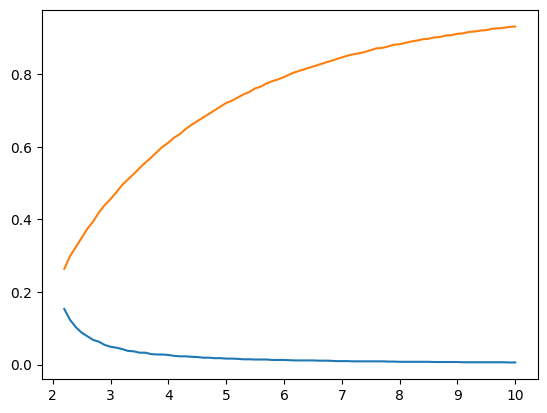

In [20]:
plt.plot(Ks[1:],a[0],Ks[1:],a[1])

In [ ]:
def get_r_mean(K,m,g=g_n,samples=200):
    rm_u = np.nan
    rm_d = np.nan
    r_1test = np.linspace(1e-4,1,samples)
    F1  = F_mean(r_1test,K,m,g=g)
    cross_point = np.sign((F1[0:-1]-1/K)*(F1[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)
    near_check = np.argmin(abs(F1[:]-1/K))
    check_err = abs(F1[near_check] - 1/K)<1e-3
    rm_u = np.nan
    rm_d = np.nan
    if len(arg_check)==2:
        r_ss = []
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
            r_ss.append(r_m)
        rm_d,rm_u = np.sort(r_ss)
        return rm_d,rm_u
    elif len(arg_check)==1:
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
        rm_u = r_m
        return rm_d,rm_u
    else:
        if check_err:
            r_a = r_1test[near_check] - 0.1
            r_b = r_1test[near_check] + 0.1
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            print(r_m)
            rm_u = r_m
        return rm_d,rm_u

### Check Again

In [25]:

import numpy as np
import pandas as pd
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from scipy.integrate import quad
from scipy.stats import norm




def Bisection(f,r_a,r_b,eps =1e-5,end=30,arg=()):
    r_c = (r_a+r_b)/2
    num = 0 
    
    while abs(f(r_c,*arg))>eps:
        r_c = (r_a+r_b)/2
        if f(r_a,*arg)*f(r_c,*arg)>0:
            r_a = r_c
        else:
            r_b = r_c
        num+=1
        if num >end:
            # print('Please select another section')
            return np.NAN
    # print(f'count : {num}')
    return r_c

def g_n(x):
    return norm.pdf(x,0,1)

def r_lock1(r,K,m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return X*I_l

    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return X*I_l
    

def r_drift1(r,K,m,g=g_n):
    X = K*r
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -X/(m)*I_d


def r_mean(r,K,m,g=g_n):
    rl = r_lock1(r,K,m,g=g_n)
    rd = r_drift1(r,K,m,g=g_n)
    return rl+rd - r

def F_lock1(r,K,m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return I_l

    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return I_l
def F_drift1(r,K,m,g=g_n):
    X = K*r
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -1/(m)*I_d

def F_lock1b(r,K,m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)
    I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
    return I_l
def F_drift1b(r,K,m,g=g_n):
    X = K*r
    O_d = X
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_d,np.inf,limit=200)
    return -1/(m)*I_d

F_l1 = np.vectorize(F_lock1)
F_d1 = np.vectorize(F_drift1)

F_l1b = np.vectorize(F_lock1b)
F_d1b = np.vectorize(F_drift1b)

def F_mean(r,K,m,g=g_n):
    Fl = F_l1(r,K,m,g=g)
    Fd = F_d1(r,K,m,g=g)
    return Fl+Fd

def F_mean_b(r,K,m,g=g_n):
    Fl = F_l1b(r,K,m,g=g)
    Fd = F_d1b(r,K,m,g=g)
    return Fl+Fd


def get_r_mean(K,m,g=g_n,samples=200):
    rm_u = np.nan
    rm_d = np.nan
    r_1test = np.linspace(1e-4,1,samples)
    F1  = F_mean(r_1test,K,m,g=g)
    cross_point = np.sign((F1[0:-1]-1/K)*(F1[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)
    near_check = np.argmin(abs(F1[:]-1/K))
    check_err = abs(F1[near_check] - 1/K)<1e-3
    rm_u = np.nan
    rm_d = np.nan
    if len(arg_check)==2:
        r_ss = []
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
            r_ss.append(r_m)
        rm_d,rm_u = np.sort(r_ss)
        return rm_d,rm_u
    elif len(arg_check)==1:
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
        rm_u = r_m
        return rm_d,rm_u
    else:
        if check_err:
            r_a = r_1test[near_check] - 0.1
            r_b = r_1test[near_check] + 0.1
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            print(r_m)
            rm_u = r_m
        return rm_d,rm_u
    

def get_r_mean_b(K,m,g=g_n,samples=200):
    rm_u = np.nan
    rm_d = np.nan
    r_1test = np.linspace(1e-4,1,samples)
    F1  = F_mean_b(r_1test,K,m,g=g)
    cross_point = np.sign((F1[0:-1]-1/K)*(F1[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)
    near_check = np.argmin(abs(F1[:]-1/K))
    check_err = abs(F1[near_check] - 1/K)<1e-3
    rm_u = np.nan
    rm_d = np.nan
    if len(arg_check)==2:
        r_ss = []
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
            r_ss.append(r_m)
        rm_d,rm_u = np.sort(r_ss)
        return rm_d,rm_u
    elif len(arg_check)==1:
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
        rm_u = r_m
        return rm_d,rm_u
    else:
        if check_err:
            r_a = r_1test[near_check] - 0.1
            r_b = r_1test[near_check] + 0.1
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            print(r_m)
            rm_u = r_m
        return rm_d,rm_u
rm_numpy = np.vectorize(get_r_mean)
rm_b_numpy = np.vectorize(get_r_mean_b)



def g_sec(x,Or,Om):
    g = norm.pdf(x,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)
def r_lock2(r,r_m,O_r,O_pm,K,m,g=g_sec):
    X = K*r
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift(0),O_r,O_pm)
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)
        return X*I_l

    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,epsabs=1e-10,limit=2000)
        return X*I_l    

def r_drift2(r,r_m,O_r,O_pm,K,m,g=g_sec):
    X = K*r
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(2*x**2)*g(x+shift(0),O_r,O_pm)
    I_d,err = quad(integrand_drift,O_p,np.inf,epsabs=1e-10,limit=200)
    I_dm,err = quad(integrand_drift,-np.inf,-O_p,epsabs=1e-10,limit=200)
    return -X/(m)*(I_d+I_dm)

def r_sec(r,r_m,O_r,O_pm,K,m,g=g_sec):
    rl = r_lock2(r,r_m,O_r,O_pm,K,m,g=g_sec)
    rd = r_drift2(r,r_m,O_r,O_pm,K,m,g=g_sec)
    return rl+rd - r

def F_lock2(r,r_m,O_r,O_pm,K,m,g=g_sec):
    X = K*r
    # shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift(0),O_r,O_pm)
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)
        return I_l

    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,epsabs=1e-10,limit=2000)
        return I_l    
    
def F_drift2(r,r_m,O_r,O_pm,K,m,g=g_sec):
    X = K*r
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(2*x**2)*g(x+shift(0),O_r,O_pm)
    I_d,err = quad(integrand_drift,O_p,5,limit=200)
    return -1/(m)*I_d

def F_2f(r,r_m,O_r,O_pm,K,m,g=g_sec):
    X = K*r
    shift = lambda x,X=X: -(K**2*r*r_m)/(2*(O_pm+X*np.sin(x))**2)/m -(K**2*r*r)/(8*(O_pm+X*np.sin(x))**2)/m 
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(2*x**2)*g(x+shift(0),O_r,O_pm)
    I_d,err = quad(integrand_drift,O_p,np.inf,epsabs=1e-10,limit=200)
    I_dm,err = quad(integrand_drift,-np.inf,-O_p,epsabs=1e-10,limit=200)

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift(0),O_r,O_pm)
    omega_p = (4/np.pi)*np.sqrt(X/m)
    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,epsabs=1e-10,limit=2000)
    else: 
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,epsabs=1e-10,limit=2000)
    return -1/(2*m)*(I_d+I_dm) + I_l


def get_F_sec(r,K,m,r_0):
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    # F_2 = F_lock2(r,r_0,O_r,O_pm,K,m,g_sec)
    F_2 = F_2f(r,r_0,O_r,O_pm,K,m,g_sec)
    return F_2
F_sec = np.vectorize(get_F_sec)

def get_r_sec(K,m,r_0,samples=200):
    rs_u = np.nan
    rs_d = np.nan

    rs_u_l = np.nan
    rs_u_d = np.nan
    if np.isnan(r_0):
        return rs_u,rs_d,rs_u_l,rs_u_d
    # r_2test = np.linspace(1e-4,(1-r_0)/2,samples)
    r_2test = np.linspace(1e-4,(1-r_0)/2,samples)
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = quad(norm.ppf,r_0/2+0.5,1)[0]/(0.5-r_0/2)
    Fs  = F_sec(r_2test,K,m,r_0)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)
    near_check = np.argmin(abs(Fs[:]-1/K))
    check_err = abs(Fs[near_check] - 1/K)<1e-3
    if len(arg_check)==2:
        r_ss = []
        for arg in arg_check:
            r_a = r_2test[arg]
            r_b = r_2test[arg+1]
            r_s = Bisection(r_sec,r_a,r_b,eps=5e-3,end=15,arg = (r_0,O_r,O_pm,K,m,g_sec))
            if np.isnan(r_s):
                r_s = (r_a+r_b)/2
            r_ss.append(r_s)
        rs_d,rs_u = r_ss
        rs_u_d = r_drift2(rs_u,r_0,O_r,O_pm,K,m,g=g_sec)
        rs_u_l = r_lock2(rs_u,r_0,O_r,O_pm,K,m,g=g_sec)

        return rs_d,rs_u,rs_u_l,rs_u_d
    elif len(arg_check)==1:
        for arg in arg_check:
            r_a = r_2test[arg]
            r_b = r_2test[arg+1]
            r_s = Bisection(r_sec,r_a,r_b,eps=5e-3,end=15,arg = (r_0,O_r,O_pm,K,m,g_sec))
            if np.isnan(r_s):
                r_s = (r_a+r_b)/2
        rs_u = r_s
        rs_u_d = r_drift2(rs_u,r_0,O_r,O_pm,K,m,g=g_sec)
        rs_u_l = r_lock2(rs_u,r_0,O_r,O_pm,K,m,g=g_sec)
        return rs_d,rs_u,rs_u_l,rs_u_d
    else:
        if check_err:
            r_a = r_2test[near_check] - 0.1
            r_b = r_2test[near_check] + 0.1
            r_s = Bisection(r_sec,r_a,r_b,eps=5e-3,end=15,arg = (r_0,O_r,O_pm,K,m,g_sec))
            print(r_s)
            rs_u = r_s
            rs_u_d = r_drift2(rs_u,r_0,O_r,O_pm,K,m,g=g_sec)
            rs_u_l = r_lock2(rs_u,r_0,O_r,O_pm,K,m,g=g_sec)
        return rs_d,rs_u,rs_u_l,rs_u_d


rm_numpy = np.vectorize(get_r_mean)
rs_numpy = np.vectorize(get_r_sec)
# F_m1 = np.vectorize(F_mean)

import warnings
warnings.filterwarnings(action='ignore')

def make_r_rsec(m,Ks):
    r_d,r_u  = rm_numpy(Ks,m)
    r_mu = F_l1(r_u,Ks,m)*(Ks*r_u)
    rs_d,rs_u,rs_u_l,rs_u_d = rs_numpy(Ks,m,r_u)
    return m,Ks,r_d,r_u,r_mu,rs_d,rs_u,rs_u_l,rs_u_d


In [26]:
r_d,r_u = rm_numpy(5,4.06,g=g_n,samples=100)
r_md = F_l1(r_d,5,4.06)*(5*r_d)
r_mu = F_l1(r_u,5,4.06)*(5*r_u)

In [27]:
R_mu = r_mu
K = 5
m = 4.06
O_pm = norm.ppf(R_mu/2+0.5)
O_r = quad(norm.ppf,R_mu/2+0.5,1)[0]/(0.5-R_mu/2)

In [28]:
F2 = np.vectorize(F_2f)
F2l = np.vectorize(F_lock2)
# Rs = np.logspace(np.log10(0.001),np.log10((1-R_mu)/2),num=50,base=10)
Rs = np.linspace((0.001),((1-R_mu)/2),num=50)
# R = rmKr_numpy(Kr,4)
# Kb =1/np.nanmax((R/Kr))
# rb = Kr[np.nanargmax((R/Kr))]*np.nanmax((R/Kr))

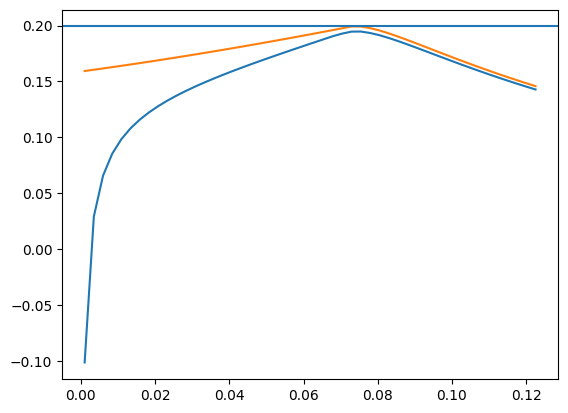

In [29]:
plt.plot(Rs,F2(Rs,R_mu,O_r,O_pm,K,m,g=g_sec))
plt.plot(Rs,F2l(Rs,R_mu,O_r,O_pm,K,m,g=g_sec))
plt.axhline(1/K)

In [105]:
Ks = np.arange(2,10+0.05,0.2)
ms = np.arange(3.5,10+0.05,0.2)
df = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d','r_sec_ul','r_sec_ud'])
df = df.set_index(['K','m'])

In [106]:
for m in tqdm(ms):
    r_ds,r_us  = rm_numpy(Ks,m,samples=100)
    r_mds = F_l1(r_ds,Ks,m)*(Ks*r_ds)
    r_mus = F_l1(r_us,Ks,m)*(Ks*r_us)
    r_sds,r_sus,r_su_ls,r_su_ds = rs_numpy(Ks,m,r_us,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su,r_su_l,r_su_d in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus,r_su_ls,r_su_ds):
        df.loc[(K,m),'r_mean_d'] = r_d
        df.loc[(K,m),'r_mean_u'] = r_u
        df.loc[(K,m),'r_main_d'] = r_md
        df.loc[(K,m),'r_main_u'] = r_mu
        df.loc[(K,m),'r_sec_d'] = r_sd
        df.loc[(K,m),'r_sec_u'] = r_su
        df.loc[(K,m),'r_sec_ul'] = r_su_l
        df.loc[(K,m),'r_sec_ud'] = r_su_d

  0%|          | 0/33 [00:00<?, ?it/s]

0.043680555555555584
0.034804797979798


KeyboardInterrupt: 

In [98]:
ms

array([3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9,
       6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9, 8.1, 8.3, 8.5,
       8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9])

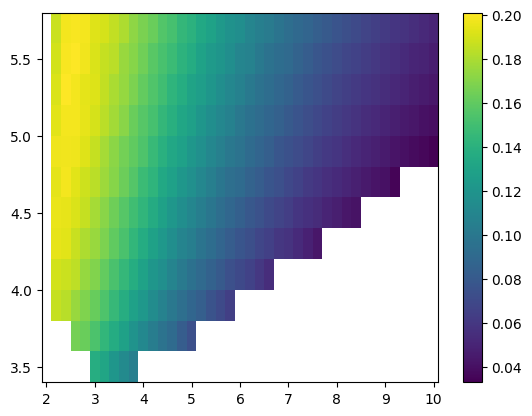

In [107]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df['r_sec_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T)
plt.colorbar()

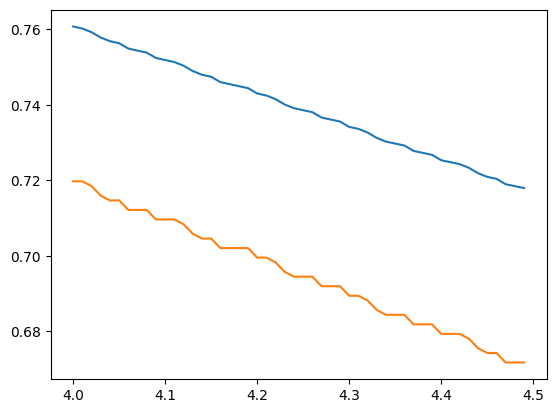

In [11]:
ms = np.arange(4.0,4.5,0.01)
# Ks = np.arange(2,10.05,0.1)
r_d,r_u = rm_numpy(5,ms,g=g_n,samples=100)
# r_d,r_u = rm_numpy(Ks,3.5,g=g_n,samples=200)
r_md = F_l1(r_d,5,ms)*(5*r_d)
r_mu = F_l1(r_u,5,ms)*(5*r_u)
plt.plot(ms,r_mu)
plt.plot(ms,r_u)

In [12]:
r_sd,r_su,r_su_l,r_su_d = rs_numpy(5,ms,r_mu,samples=100)
# ms[~np.isnan(r_su)][0]

0.0751444841555706
0.0740292191795873


In [15]:
ms[~np.isnan(r_su)][0]

4.139999999999997

Text(0, 0.5, '$r$')

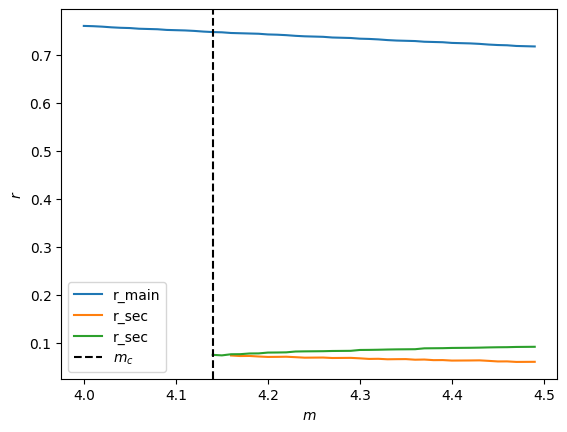

In [13]:
plt.plot(ms,r_mu,label='r_main')
plt.plot(ms,r_sd,label='r_sec')
plt.plot(ms,r_su,label='r_sec')
plt.axvline(ms[~np.isnan(r_su)][0],color='black',ls='--',label='$m_c$')
plt.legend()
plt.xlabel('$m$')
plt.ylabel('$r$')

## RE Foward 0

In [5]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [44]:
df_read = pd.read_excel('Order parameter and secondary cluster2.xlsm',index_col=[0,1])
ms = df_read['r_mean_d'].unstack().columns
core = 21
index_ = 0
Ks = np.arange(0.1,10+0.05,0.1)
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 3

In [45]:
df = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d','r_sec_ul','r_sec_ud'])
df = df.set_index(['K','m'])

In [46]:
for m in tqdm(m_set[num][16:]):
    # m = round(m,2)
    r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
    r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
    r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
    r_mus = df_read['r_main_u'].unstack()[m].to_numpy()
    r_sds,r_sus,r_su_ls,r_su_ds = rs_numpy(Ks,m,r_us,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su,r_su_l,r_su_d in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus,r_su_ls,r_su_ds):
        df.loc[(K,m),'r_mean_d'] = r_d
        df.loc[(K,m),'r_mean_u'] = r_u
        df.loc[(K,m),'r_main_d'] = r_md
        df.loc[(K,m),'r_main_u'] = r_mu
        df.loc[(K,m),'r_sec_d'] = r_sd
        df.loc[(K,m),'r_sec_u'] = r_su
        df.loc[(K,m),'r_sec_ul'] = r_su_l
        df.loc[(K,m),'r_sec_ud'] = r_su_d

  0%|          | 0/5 [00:00<?, ?it/s]

nan


In [48]:
m_set[num][16:]

Float64Index([8.0, 8.1, 8.2, 8.3, 8.4], dtype='float64', name='m')

In [47]:
df.sort_index().to_excel(f'231025 MULTI/{num}-2 Order parameter and secondary cluster.xlsm')

In [43]:
500*8/3600

1.1111111111111112